# \[Project title\]

## 1. Business understanding

Global Warming and its effects to winery businesses and grapevines, and how data mining can help analyze the trends.

This notebook proposes a data mining solution to address global warming.

## 2. Setup

The purpose of this section is to improve the organization and efficiency of your Python code.

### Coding constants

Declare any constants used in your project. You should declare as constants any value that does not change during the execution of your programming code. Constants improve the clarity and maintainability of your code. Constants also make your code safer by avoiding unforeseen changes in values that should not change.

In [2]:
GRAPH_WIDTH = 6
GRAPH_HEIGHT = 5

### Common imports

Include imports to modules used throughout your project. The benefits of including common imports at the beginning of your project include:

- It enables users of your notebook to check for dependencies and proceed with any installations if necessary. If imports are dispersed, the only way to find them is by browsing through the whole notebook.
- Avoid running code that uses a dependency before importing it.
- Importing a module can take time. Putting the imports at the beginning means it will happen as soon as you start the notebook. For example, if you do the import within a function, you may experience slowness during its execution.
- However, if an import is too specific and only used once, you may include the import right in the cell where it is used.

In [3]:
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data modeling libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### Data loading

Load your data in a format suitable for working with Pandas DataFrames. Use Pandas methods to inspect the shape and attributes of your data.

In [4]:
df = pd.read_csv(r"C:\Users\joyce\Downloads\CIS3200\finalproject\5_Wine_Dataset.csv")
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [5]:
df.shape

(178, 14)

In [6]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

## 3. Data understanding

Explore the data by performing visualizations, check the ranges and distributions of numeric values using histograms, and examine correlations among the attribute variables. In supervised learning, examine correlations between the target variables and attributes.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Attributes variables distribution

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

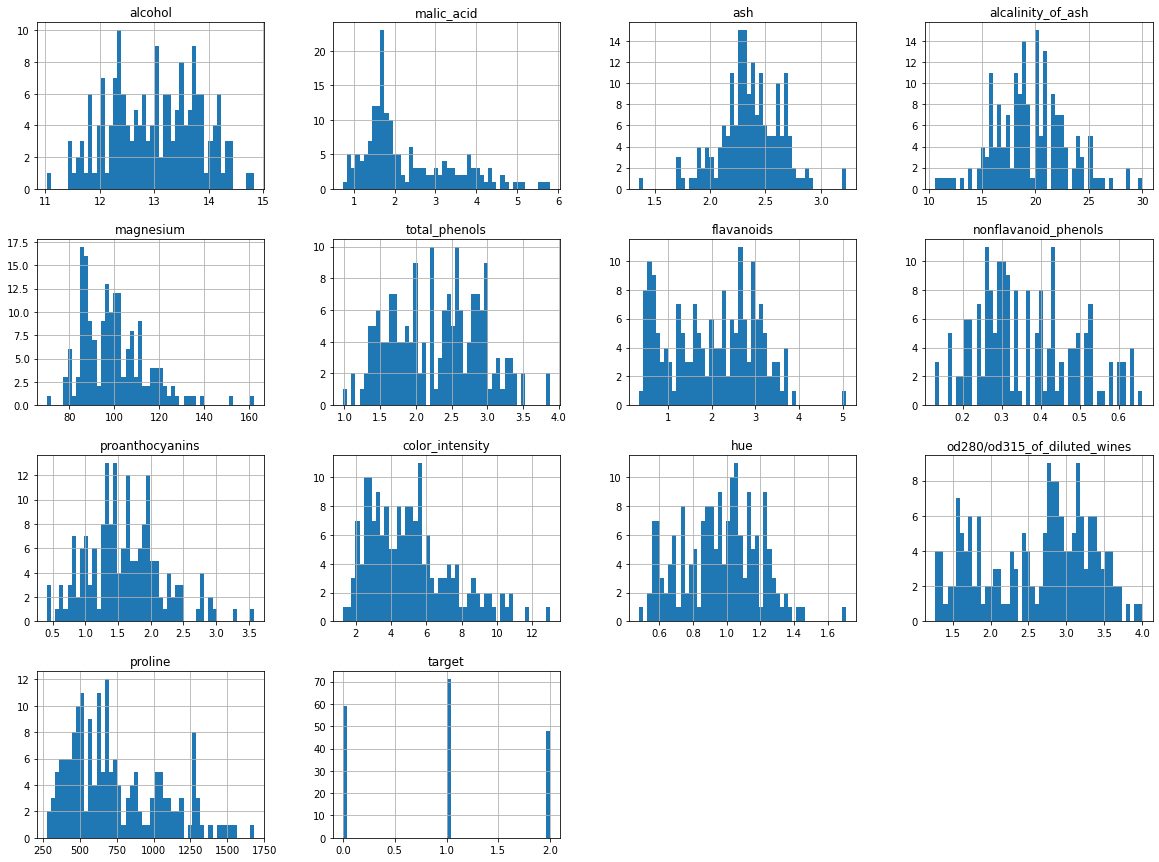

In [8]:
df.hist(bins=50, figsize=(20,15))

#### observations:
* There are some variations in the attributes ranges. For example, alcohol ranges from 11 to 15 while total_phenols ranges from 1.0 to 4.0.
* 

### Target variable distribution

<AxesSubplot:>

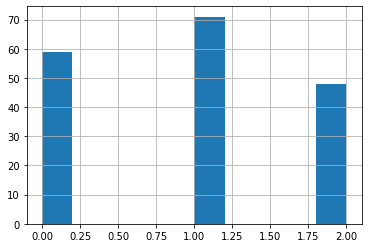

In [9]:
df['target'].hist()

#### observations:
* The plot shows that the minimum target is 0, at 50% the target is 1, and the maximum target is 2

### Visualizing relationships between the target variable and attributes 

**Function for continuous attributes:**

In [10]:
def plot_class_attribute_dist(df, class_var, attribute):
    df.groupby(class_var)[attribute].plot.hist(
        alpha=0.4, figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))
    plt.suptitle(attribute)
    plt.legend()

#### Ash versus target

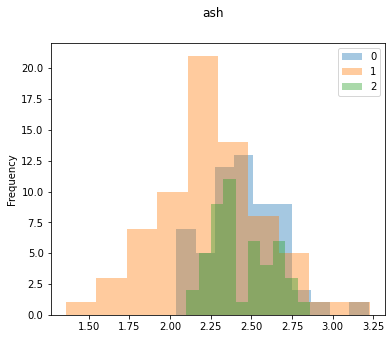

In [27]:
plot_class_attribute_dist(df, 'target', 'ash')

#### Observations:
The plot shows:
* When target is 0, the ash 

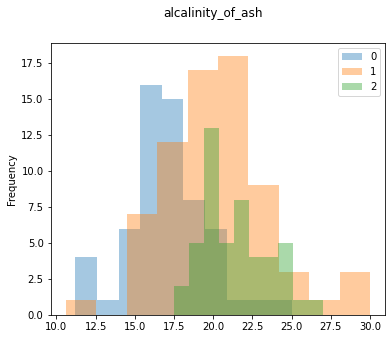

In [28]:
plot_class_attribute_dist(df, 'target', 'alcalinity_of_ash')

#### Observations:


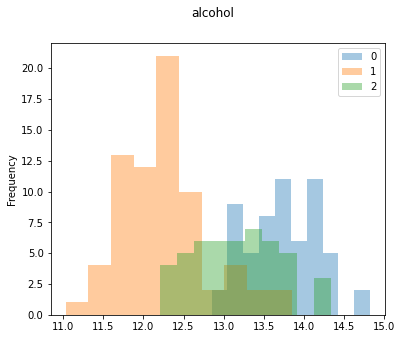

In [11]:
plot_class_attribute_dist(df, 'target', 'alcohol')

#### observations:
The plot shows:
* When target is 0, the ranges are 13.0 to 15.0
* When target is 1, the ranges are 11.0 to 14.0
* When target is 2, the ranges are 12.0 to 14.0

Thus, the data suggests 

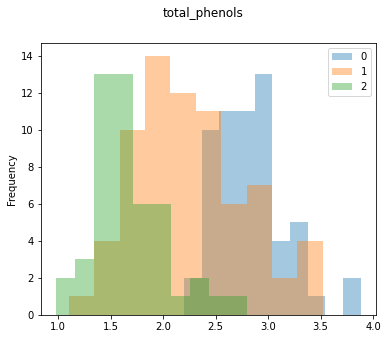

In [12]:
plot_class_attribute_dist(df, 'target', 'total_phenols')

#### observations:


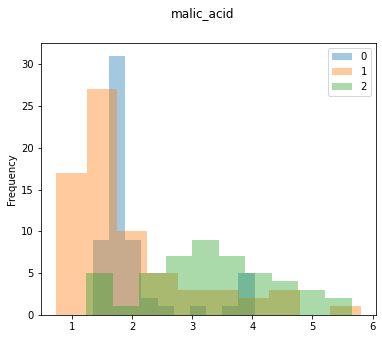

In [15]:
plot_class_attribute_dist(df, 'target', 'malic_acid')

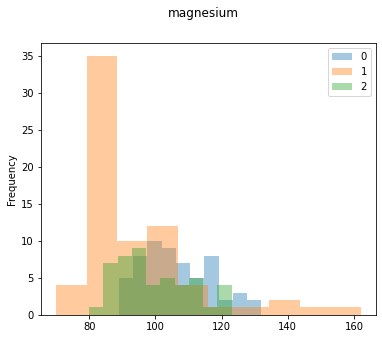

In [17]:
plot_class_attribute_dist(df, 'target', 'magnesium')

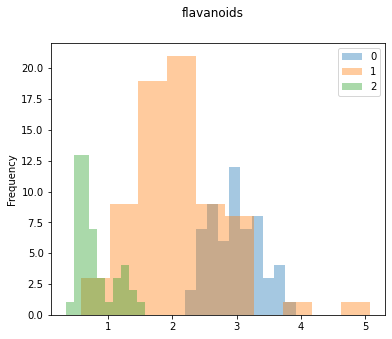

In [19]:
plot_class_attribute_dist(df, 'target', 'flavanoids')

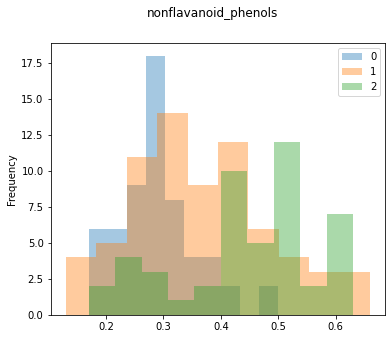

In [20]:
plot_class_attribute_dist(df, 'target', 'nonflavanoid_phenols')

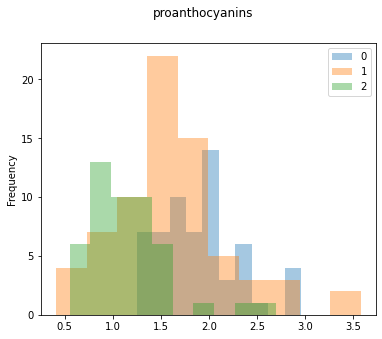

In [21]:
plot_class_attribute_dist(df, 'target', 'proanthocyanins')

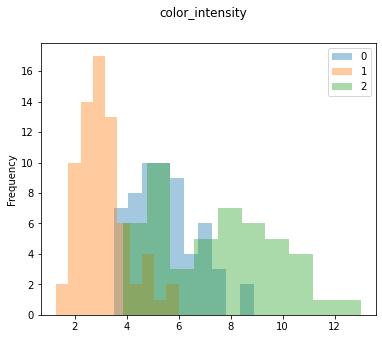

In [23]:
plot_class_attribute_dist(df, 'target', 'color_intensity')

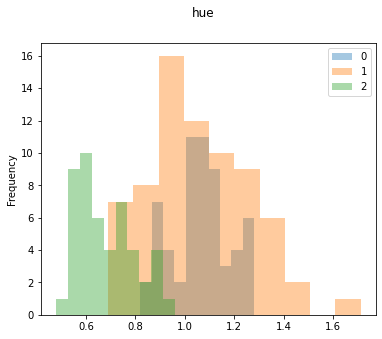

In [24]:
plot_class_attribute_dist(df, 'target', 'hue')

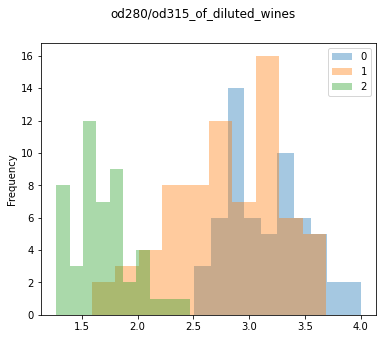

In [26]:
plot_class_attribute_dist(df, 'target', 'od280/od315_of_diluted_wines')

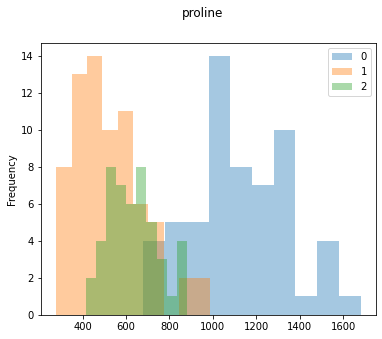

In [25]:
plot_class_attribute_dist(df, 'target', 'proline')

## 4. Data processing (optional)

Perform data cleaning and transformation tasks as necessary. These tasks may include:
- Dealing with missing values and outliers
- Drop attributes that provide no valuable information for the data mining goal
- Discretize continuous attributes
- Encode non-numeric attributes
- Derive new attributes from existing ones
- Feature scaling.

You may need to perform some data processing operations after loading the data to enhance the exploration of the data and generate better visualizations in the data understanding phase.

## 5. Data Modeling

Train different models and calibrate the parameters of the most promising ones to optimal values.

### Fitting a model

Train models from different categories using standard parameters.

### Evaluating performance

Measure and compare performance using cross-validation.

### Assessing feature importance

In supervised learning, examine the importance of the attributes with respect to the target variable. You may use these results back in the data understanding phase.

## 6. Evaluation

Measure the performance of your final model on the test set to estimate the generalization error.